In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28)

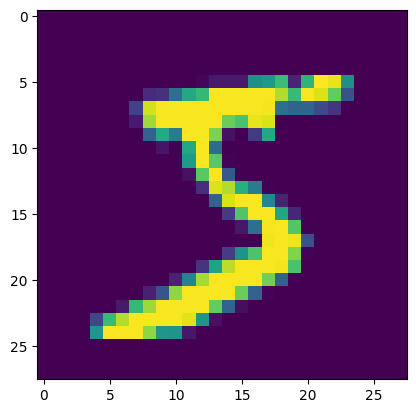

In [ ]:
plt.imshow(X_train[0])

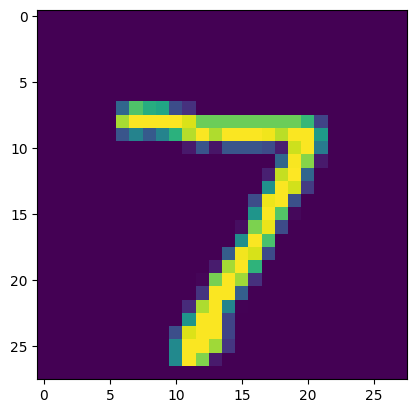

In [ ]:
plt.imshow(X_test[0])

In [ ]:
# convert into vector
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)
X_train.shape

(60000, 784)

In [ ]:
X_train.max()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.max()

1.0

In [ ]:
# Model

In [ ]:
input_dim = X_train.shape[1]

# Définir le modèle avec les bonnes dimensions
input_layer = Input(shape=(input_dim,))
bottleneck = Dense(32, activation='relu', name='bottleneck')(input_layer)
output = Dense(input_dim, activation='sigmoid', name='output')(bottleneck)

In [ ]:
autoencoder=Model(input_layer,output)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoded_layer = Input(shape = (32,), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoded_layer (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
#train
train=autoencoder.fit(X_train, X_train,epochs=20, batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0847
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0282
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0157
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0135
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0109
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0107
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0104
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0103
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0103
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

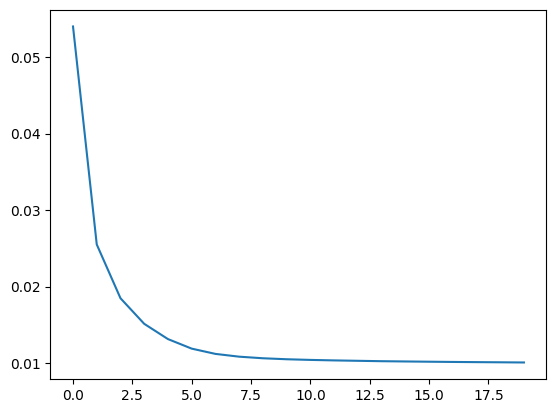

In [ ]:
plt.plot(train.history['loss'])

In [24]:
encoded_data = encoder.predict(X_test, batch_size=512)
encoded_data.shape
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(10000, 784)

In [25]:
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data.shape

(10000, 28, 28)

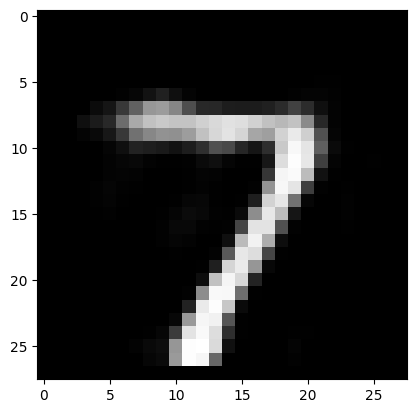

In [26]:
plt.imshow(output_data[0], cmap ='gray')


In [31]:
X_test = X_test.reshape(10000, 28,28)
X_test.shape

(10000, 28, 28)

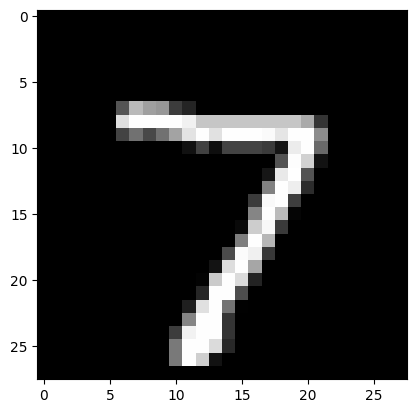

In [32]:
plt.imshow(X_test[0], cmap = 'gray')
